In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
import re

In [3]:
def remove_unwanted(text):
    text=str(text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    return(text)

In [4]:
def remove_stopwords(text):
    text=str(text)
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return(text)

In [5]:
def common_words(text):
    text_tokens=word_tokenize(text)
    fdist=FreqDist()
    for word in text_tokens:
        fdist[word.lower()]+=1
    fdist_10=fdist.most_common(10)
    return(fdist_10)

In [6]:
def convert_to_single_string(text):
    single_text=""
    for i in range(len(text)):
        if(i==0):
            single_text=single_text+text[i]
        else:
            single_text=single_text+" "+text[i]
    return(single_text)

In [7]:
def remove_punctuations(text):
    punctuation_remover=RegexpTokenizer(r'\w+')
    punctuation_remover.tokenize(text)
    return (text)

In [8]:
def lowercase(text):
    return(text.lower())

In [9]:
def lemma(text):
    text_tokens=word_tokenize(text)
    word_lem=WordNetLemmatizer()
    #print(text_tokens)
    lemmatized_text=[]
    i=0
    for word in text_tokens:
        lemmatized_text.append(word_lem.lemmatize(word))
        i+=1
    return(lemmatized_text)

In [10]:
data_df=pd.read_csv(r"D:\Work\Class\Seminar\Propaganda_Dataset_tweets.csv")

In [11]:
data_df.columns=["Source","Indicator","Tweet"]

In [12]:
data_df['Tweet']=data_df['Tweet'].apply(lowercase)
data_df['Tweet']=data_df['Tweet'].apply(remove_unwanted)
data_df['Tweet']=data_df['Tweet'].apply(remove_stopwords)
data_df['Tweet']=data_df['Tweet'].apply(remove_punctuations)
data_df['Tweet']=data_df['Tweet'].apply(lemma)
data_df['Tweet']=data_df['Tweet'].apply(convert_to_single_string)

In [13]:
X=data_df['Tweet']
y=data_df['Indicator'].values

In [14]:
final_dataset=pd.DataFrame({"Indicator":y ,"Tweet":X})

In [15]:
X_train,X_test, y_train,y_test=train_test_split(final_dataset["Tweet"].values,final_dataset["Indicator"].values,test_size=0.2)

In [16]:
tfidfvectorizer = TfidfVectorizer(use_idf=True,sublinear_tf=True)
tfidfvectors_train = tfidfvectorizer.fit_transform(X_train)
tfidfvectors_test  = tfidfvectorizer.transform(X_test)

In [17]:
NaiveBayes=naive_bayes.MultinomialNB()
NaiveBayes.fit(tfidfvectors_train,y_train)

MultinomialNB()

In [18]:
scores=cross_val_score(NaiveBayes,tfidfvectors_train,y_train,scoring="accuracy",cv=5)

In [19]:
print(scores)

[0.82775453 0.82845188 0.82043236 0.82182706 0.83542538]


In [21]:
pred=NaiveBayes.predict(tfidfvectors_test)

In [22]:
prob=NaiveBayes.predict_proba(tfidfvectors_test)[:,1]#[:,1]converts it to a 1 d array

In [23]:
pred[200]

1

In [24]:
y_test[200]

1

In [25]:
print(classification_report(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1735
           1       0.86      0.83      0.85      1850

    accuracy                           0.84      3585
   macro avg       0.84      0.84      0.84      3585
weighted avg       0.84      0.84      0.84      3585

Confusion Matrix: [[1484  251]
 [ 310 1540]]
AUC: 0.9211447932081939


In [26]:
print(y_test)

[1 0 0 ... 0 1 0]


In [27]:
print(prob)

[0.51645869 0.15332787 0.08632939 ... 0.20960107 0.75602111 0.09344676]


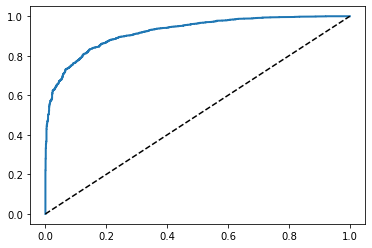

In [85]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr,tpr)
plt.savefig("ROC_Curve_NaiveBayes_Prop")
plt.show()


In [31]:
precisions, recalls, thresholds=precision_recall_curve(y_test,pred)

In [32]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g--",label="Recall")

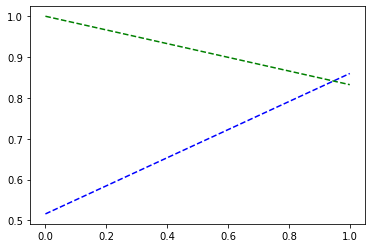

In [84]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.savefig("Precision_Recall_NaiveBayes.png")
plt.show()


In [42]:
Tweet="its clear that Bangladesh Government is enabling the genocide of Hindus in Bangladesh. They have now ensured #iskcon accounts are suspended. Because @iskcon had gone to UNSadly Indian government, #Modi is silent expect for a long tweet about Eid"

In [46]:
Tweet=lowercase(Tweet)
Tweet=remove_unwanted(Tweet)
Tweet=remove_stopwords(Tweet)
Tweet=remove_punctuations(Tweet)
Tweet=lemma(Tweet)
Tweet=convert_to_single_string(Tweet)

In [62]:
list_tweet=list()

In [63]:
list_tweet.append(Tweet)

In [64]:
tfidfvectorizer = TfidfVectorizer()
tfidfvectors_train = tfidfvectorizer.fit_transform(X_train)
tfidfvectors_test  = tfidfvectorizer.transform(list_tweet)

In [65]:
print(list_tweet)

['clear bangladesh government enabling genocide hindu bangladesh ensured iskcon account suspended iskcon gone unsadly indian government modi silent expect long tweet eid']


In [66]:
pred=NaiveBayes.predict(tfidfvectors_test)

In [67]:
print(pred)

[1]


In [68]:
with open("#INC_file.txt","r") as file:
    data=file.read().split(',')

In [69]:
data_list=[]
for i in range(1,len(data)):
    data_list.append(data[i])

In [70]:
tfidfvectors_test  = tfidfvectorizer.transform(data_list)

In [71]:
pred=NaiveBayes.predict(tfidfvectors_test)

In [72]:
print(pred)

[0 1 0 0 0 1 0 1 1 1 1]


 'Donkey will forever be a donkey #caraccident #amitmalviya #indiannationalcongress\n#inc #bjp'
